<a href="https://colab.research.google.com/github/alinapradhan/carpriceanalysis/blob/main/CarPriceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Date and time handling
import datetime

# Model training utilities
from sklearn.model_selection import train_test_split

# Data preprocessing
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xg

# Model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



data= pd.read_csv('car data.csv')
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data['Car_Name'].value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda CB Trigger,1
Yamaha FZ S,1
Bajaj Pulsar 135 LS,1


In [6]:
data.drop('Car_Name', axis=1, inplace=True)

In [7]:
# use the Year -> to get the car's age
current_year = datetime.datetime.now().year
data['Car_Age'] = current_year - data['Year']
data.drop('Year', inplace=True, axis=1)

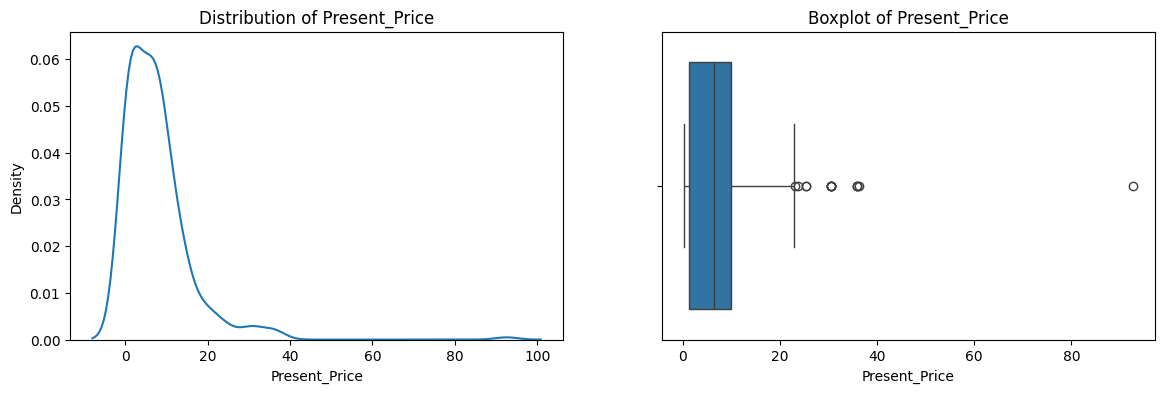

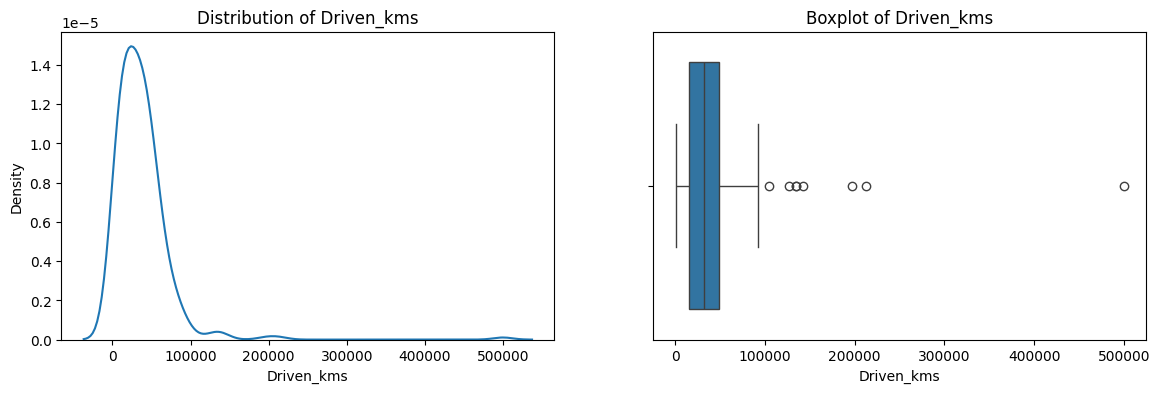

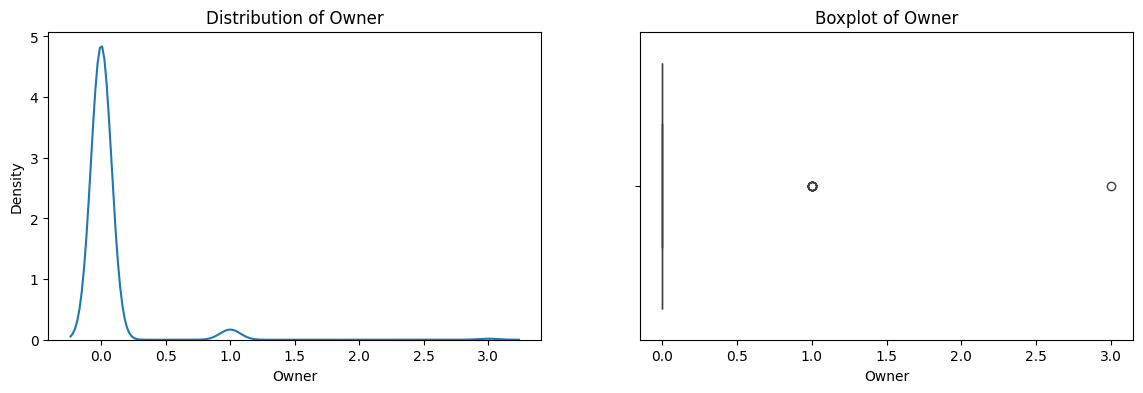

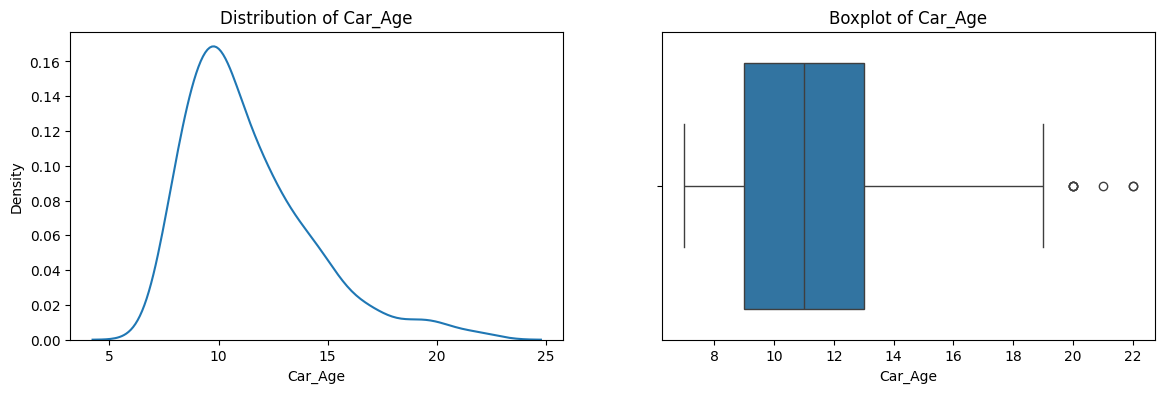

In [8]:
for col in data.columns:

    # Skip columns that are either categorical or the target variable
    if data[col].dtype == 'object' or col == 'Selling_Price':
        continue

    # Set up the figure for two subplots
    plt.figure(figsize=(14, 4))

    # Plot the KDE plot for the distribution of the column
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=data, x=col)
    plt.title(f'Distribution of {col}')

    # Plot the boxplot to show spread and outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x=col, orient='h')
    plt.title(f'Boxplot of {col}')

    # Show the plots
    plt.show()

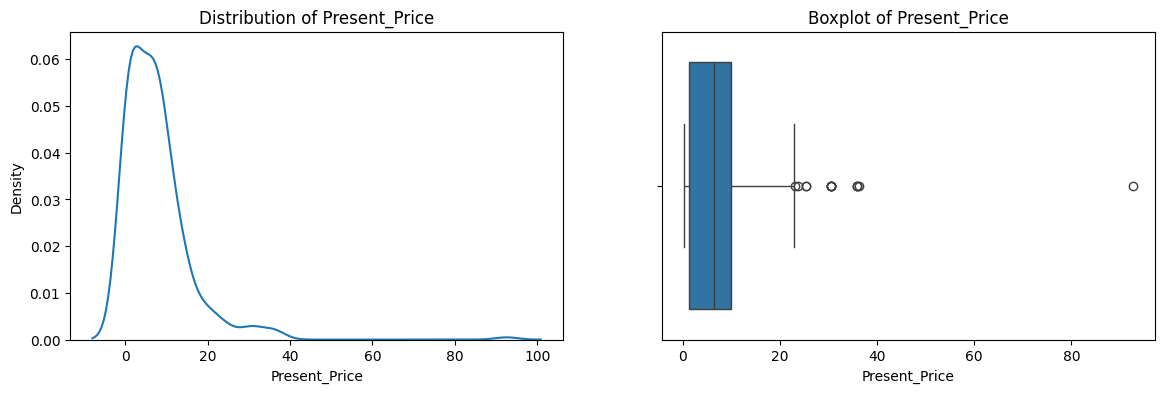

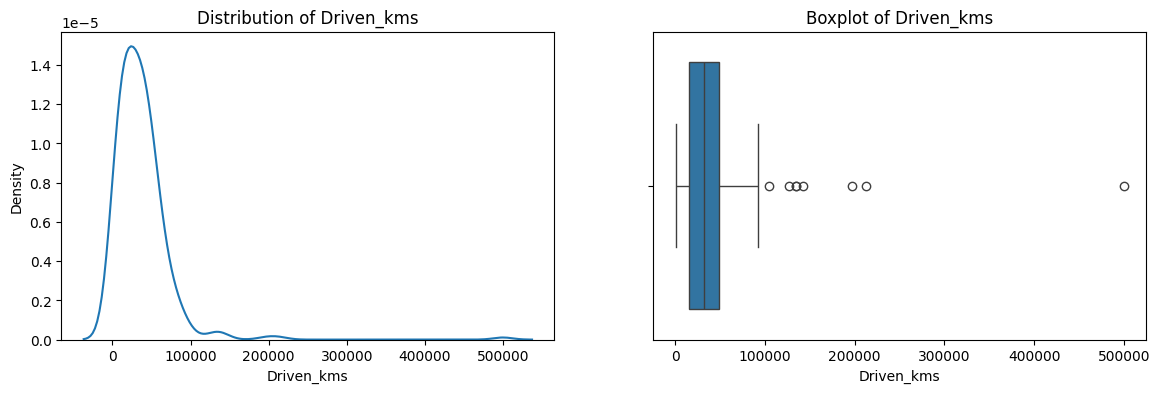

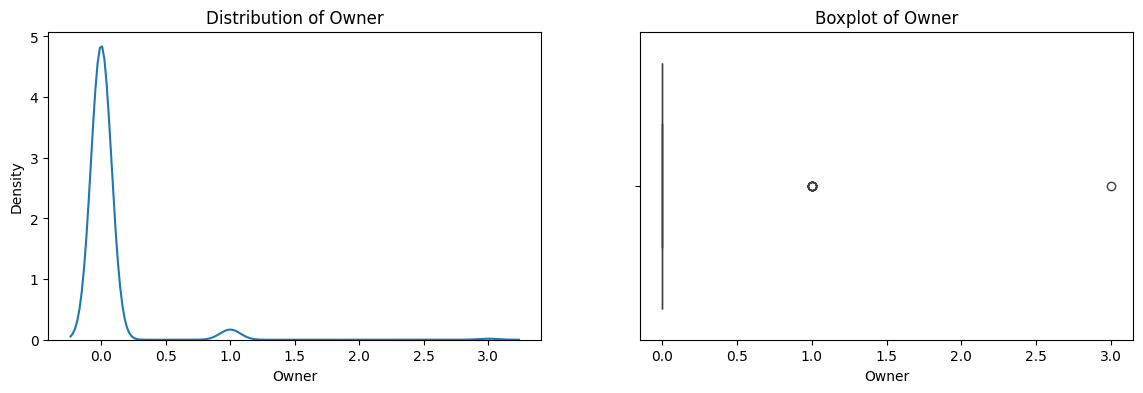

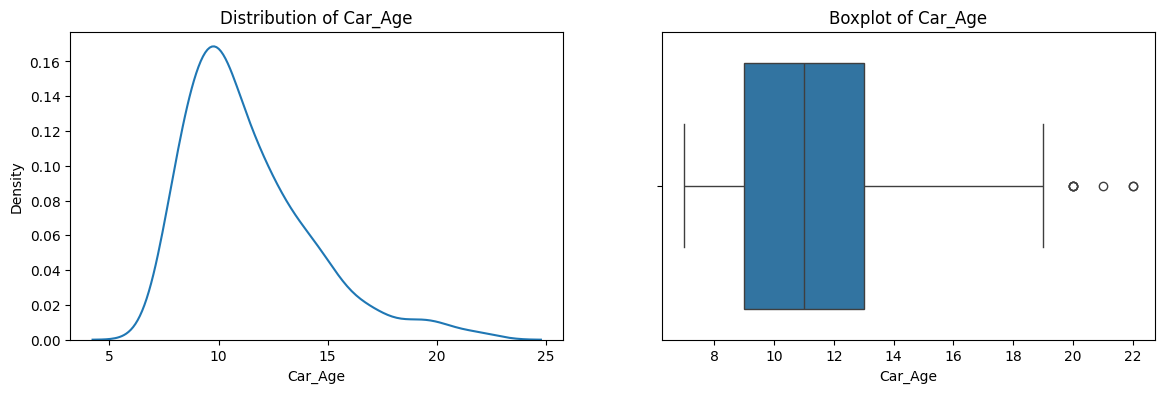

In [9]:
for col in data.columns:

    # Skip columns that are either categorical or the target variable
    if data[col].dtype == 'object' or col == 'Selling_Price':
        continue

    # Set up the figure for two subplots
    plt.figure(figsize=(14, 4))

    # Plot the KDE plot for the distribution of the column
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=data, x=col)
    plt.title(f'Distribution of {col}')

    # Plot the boxplot to show spread and outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x=col, orient='h')
    plt.title(f'Boxplot of {col}')

    # Show the plots
    plt.show()

In [10]:
data['Owner'].value_counts()

,count
Owner,
0,290
1,10
3,1


In [11]:
# features and labels
X= data.drop('Selling_Price', axis=1)
Y= data['Selling_Price']

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2)

In [13]:
# get the numeric and categorical columns
numeric_features = X.select_dtypes(exclude=['object']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [14]:
# out of all the numeric features, get only the continious ones
for col in numeric_features:
    print(f"{col} := {len(data[col].value_counts())}\n")

# Set a threshold for unique values (e.g., columns with fewer than 10 unique values are likely categorical)
unique_value_threshold = 10

# Identify continuous numeric columns
continuous_numeric_cols = [col for col in numeric_features if data[col].nunique() >= unique_value_threshold]

Present_Price := 148

Driven_kms := 206

Owner := 3

Car_Age := 16



In [15]:
# preprocessor -> Power transformer + One hot encoder
preprocessor= ColumnTransformer([
    ('power_transformer', PowerTransformer(), continuous_numeric_cols),
    ('one_hot_encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

In [16]:
model= RandomForestRegressor()

In [17]:
pipe= Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [18]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power_transformer',
                                                  PowerTransformer(),
                                                  ['Present_Price',
                                                   'Driven_kms', 'Car_Age']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Fuel_Type', 'Selling_type', 'Transmission'], dtype='object'))])),
                ('model', RandomForestRegressor())])

In [19]:
y_preds= pipe.predict(X_test)

In [20]:
mean_absolute_error(y_test, y_preds)

0.43234754098360695

In [21]:
mean_squared_error(y_test, y_preds)

0.4121879311475417

In [22]:
np.sqrt(mean_squared_error(y_test, y_preds))

0.6420186376948427

In [23]:
r2_score(y_test, y_preds)

0.9743506797166998

In [24]:
# finding the best model...
best_model= -1
best_r2= 0

models= [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), BayesianRidge(), xg.XGBRegressor()]

for model in models:

    pipe= Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)

    y_preds= pipe.predict(X_test)

    r2_sc= r2_score(y_test, y_preds)

    if r2_sc > best_r2:
        best_r2= r2_sc
        best_model= model

    print(f"{model} := {r2_sc}\n")

LinearRegression() := 0.7805401548243924

RandomForestRegressor() := 0.9782773230261689

GradientBoostingRegressor() := 0.9674589286744938

AdaBoostRegressor() := 0.9406928664879737

BayesianRidge() := 0.7818511385988189

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) := 0.9594074021884227



In [25]:
print(f"Best model:= {best_model} with an R2 score -> {best_r2}")

Best model:= RandomForestRegressor() with an R2 score -> 0.9782773230261689
